### K-Nearest Neighbor Algorithmus:

#### Parameter:  

dataset = (X, Y)  
mit X := Features  
und Y := Classes  

K := Hyperparameter für die nächsten k Nachbarn  
sample := Neuer Datenpunkt zum Klassifizieren 

#### Pseudo-Code:

kNN (dataset, K, sample):  
  - Bestimme von jedem Punkt $p \in dataset$ die Distanz, mit der geg. Distanzfunktion.
  - Bestimme die $K$ nächst gelegenen Nachbarn und bestimme die zugehörige Klasse von $sample$.  

In [1]:
import numpy as np
np.random.seed(42)

In [2]:
def generate_dataset():
    num_samples_class1 = 10
    num_samples_class2 = 6
    num_samples_class3 = 13
    cov = np.array([[1, 0], [0, 1]])
    data1 = np.random.multivariate_normal(
        np.array([0, 0]), cov, num_samples_class1
    )
    data2 = np.random.multivariate_normal(
        np.array([-10, 4]), cov, num_samples_class2
    )
    data3 = np.random.multivariate_normal(
        np.array([10, 10]), cov, num_samples_class3
    )
    data = np.concatenate((data1, data2, data3), axis=0)
    classes = np.array(
        [0 for i in range(num_samples_class1)] +
        [1 for i in range(num_samples_class2)] +
        [2 for i in range(num_samples_class3)]
    )
    return data, classes

In [3]:
x, y = generate_dataset()

In [4]:
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

print(f"x:\n{x}")
print(f"y:\n{y}")

x shape: (29, 2)
y shape: (29,)
x:
[[  0.49671415  -0.1382643 ]
 [  0.64768854   1.52302986]
 [ -0.23415337  -0.23413696]
 [  1.57921282   0.76743473]
 [ -0.46947439   0.54256004]
 [ -0.46341769  -0.46572975]
 [  0.24196227  -1.91328024]
 [ -1.72491783  -0.56228753]
 [ -1.01283112   0.31424733]
 [ -0.90802408  -1.4123037 ]
 [ -8.53435123   3.7742237 ]
 [ -9.9324718    2.57525181]
 [-10.54438272   4.11092259]
 [-11.15099358   4.37569802]
 [-10.60063869   3.70830625]
 [-10.60170661   5.85227818]
 [  9.98650278   8.94228907]
 [ 10.82254491   8.77915635]
 [ 10.2088636    8.04032988]
 [  8.67181395  10.19686124]
 [ 10.73846658  10.17136828]
 [  9.88435172   9.6988963 ]
 [  8.52147801   9.28015579]
 [  9.53936123  11.05712223]
 [ 10.34361829   8.23695984]
 [ 10.32408397   9.61491772]
 [  9.323078    10.61167629]
 [ 11.03099952  10.93128012]
 [  9.16078248   9.69078762]]
y:
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [5]:
import matplotlib.pyplot as plt

def plot_dataset(x, y):
    colors = ["red", "blue", "green"]
    for index, point in enumerate(x):
        plt.scatter(point[0], point[1], color=colors[y[index]])
    plt.show()

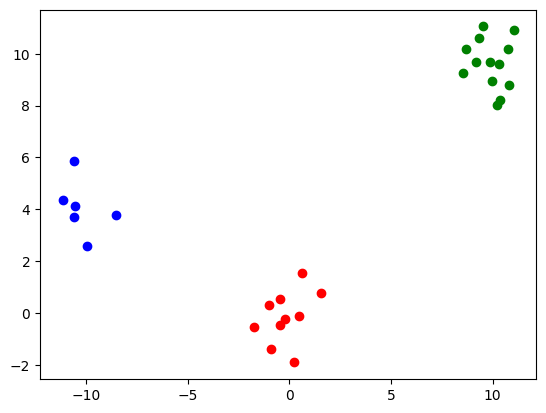

In [6]:
plot_dataset(x, y)